# Análisis de Algoritmos y Estructuras para Datos Masivos 2023
## Unidad 3 - Tarea
### David Aarón Ramírez Olmeda

### Introducción
A continuación se presenta un código paso a paso para realizar el experimento propuesto

In [ ]:
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
import math

In [ ]:
# Leer datos de la lista de posteo
df = pd.read_json('listas-posteo-100.json', lines=True)
df = df.rename(columns={1: 'lista'})
df

,0,lista
0,_url,"[1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, ..."
1,amlo,"[5, 8, 12, 14, 20, 22, 24, 28, 29, 32, 34, 35,..."
2,@lopezobrador_,"[2, 3, 7, 9, 11, 12, 15, 16, 18, 19, 21, 22, 2..."
3,_num,"[25, 31, 32, 37, 52, 62, 66, 74, 91, 92, 94, 1..."
4,presidente,"[9, 10, 11, 26, 41, 45, 73, 78, 83, 90, 100, 1..."
...,...,...
95,sigue,"[52, 61, 90, 92, 112, 114, 203, 292, 361, 406,..."
96,ebrard,"[340, 348, 355, 389, 502, 539, 555, 558, 572, ..."
97,@m_ebrard,"[351, 359, 366, 623, 1745, 1983, 2838, 2923, 3..."
98,congreso,"[330, 586, 999, 1393, 1988, 2348, 2502, 2673, ..."


### Definir funciones de búsqueda

**Búsqueda binaria acotada:** este algoritmo busca un elemento en una lista ordenada dividiendo su espacio de búsqueda a la mitad en cada iteración. En cada iteración se compara el elemento a buscar con el elemento central de la lista y se descarta la mitad en la que no se encuentra el elemento. Este proceso se repite hasta que se encuentra el elemento o se determina que no se encuentra en la lista.

In [ ]:
def busqueda_binaria_acotada(lista, elemento):
    izquierda = 0
    derecha = len(lista) - 1
    while izquierda <= derecha:
        medio = (izquierda + derecha) // 2
        if lista[medio] == elemento:
            return True
        elif lista[medio] < elemento:
            izquierda = medio + 1
        else:
            derecha = medio - 1
    return False

**Búsqueda secuencial B0:** este algoritmo busca un elemento en una lista ordenada recorriendo secuencialmente la lista desde el principio hasta el final. Se compara cada elemento de la lista con el elemento a buscar hasta encontrarlo o hasta que se llegue al final de la lista.

In [ ]:
def busqueda_secuencial_bo(lista, elemento):
    for i in range(len(lista)):
        if lista[i] == elemento:
            return True
        elif lista[i] > elemento:
            return False
    return False

**Búsqueda no acotada B1:** este algoritmo es similar a la búsqueda secuencial, pero en lugar de recorrer la lista desde el principio, comienza en un índice determinado (por ejemplo, el índice donde se encontró el último elemento buscado). De esta manera, se evita buscar en elementos que ya se han recorrido.

In [ ]:
def busqueda_no_acotada_b1(lista, elemento):
    i = 0
    while i < len(lista) and lista[i] < elemento:
        i += 1
    return i < len(lista) and lista[i] == elemento

**Búsqueda no acotada B2:** este algoritmo es similar a B1, pero en lugar de comenzar en un índice determinado, comienza en un índice calculado a partir de la posición del elemento anterior y la distancia promedio entre los elementos en la lista. Este índice se ajusta en cada iteración para acercarse al elemento a buscar. Esto permite realizar búsquedas más rápidas en listas donde los elementos están distribuidos uniformemente.

In [ ]:
def busqueda_no_acotada_b2(lista, elemento):
    i = 0
    while i < len(lista):
        if lista[i] == elemento:
            return True
        i += 1
    return False

**Bosqueje en pseudo-código la implementación de la búsqueda casí optima Bk:** El algoritmo divide la lista en bloques de tamaño k = sqrt(n) y realiza una búsqueda binaria en cada bloque. Si se encuentra el elemento en un bloque, devuelve su posición en ese bloque. De lo contrario, se realiza una búsqueda binaria en toda la lista. Este algoritmo es eficiente para listas grandes y evita el peor caso de búsqueda binaria.

In [ ]:
def Bk(lista, elemento):
    n = len(lista)
    k = math.floor(math.sqrt(n))

    # Aplicar búsqueda binaria en los k bloques
    for i in range(k):
        left = i * (n // k)
        right = (i + 1) * (n // k) - 1
        if lista[left] <= elemento <= lista[right]:
            return busqueda_binaria_acotada(lista[left:right + 1], elemento) + left

    # Si no se encontró en los bloques, hacer una búsqueda binaria en toda la lista
    return busqueda_binaria_acotada(lista, elemento)

### Experimento
Seleccione 1000 identificadores de documentos al azar, entre 1 y 𝑛 (recuerde que 𝑛=50,000) <br />
Grafique el tiempo promedio de buscar los 1000 identificadores en todas las listas (un solo número que represente las 100×1000 búsquedas).

In [ ]:
# Generar identificadores al azar
identificadores = random.sample(range(1, 50001), 1000)

In [ ]:
# Medir tiempo de búsqueda para cada algoritmo
tiempos_promedio = {'Búsqueda binaria acotada': [],
                    'Búsqueda secuencial B0': [],
                    'Búsqueda no acotada B1': [],
                    'Búsqueda no acotada B2': [],
                    'Búsqueda Bk': []}

tiempos_promedio_final = {'Búsqueda binaria acotada': [],
                    'Búsqueda secuencial B0': [],
                    'Búsqueda no acotada B1': [],
                    'Búsqueda no acotada B2': [],
                    'Búsqueda Bk': []}

for identificador in identificadores:
    for index, row in df.iterrows():
        lista = row['lista']
        tiempo_inicio = time.time()
        busqueda_binaria_acotada(lista, identificador)
        tiempo_fin = time.time()
        tiempos_promedio['Búsqueda binaria acotada'].append(tiempo_fin - tiempo_inicio)

        tiempo_inicio = time.time()
        busqueda_secuencial_bo(lista, identificador)
        tiempo_fin = time.time()
        tiempos_promedio['Búsqueda secuencial B0'].append(tiempo_fin - tiempo_inicio)

        tiempo_inicio = time.time()
        busqueda_no_acotada_b1(lista, identificador)
        tiempo_fin = time.time()
        tiempos_promedio['Búsqueda no acotada B1'].append(tiempo_fin - tiempo_inicio)
        
        tiempo_inicio = time.time()
        busqueda_no_acotada_b2(lista, identificador)
        tiempo_fin = time.time()
        tiempos_promedio['Búsqueda no acotada B2'].append(tiempo_fin - tiempo_inicio)
        
        tiempo_inicio = time.time()
        Bk(lista, identificador)
        tiempo_fin = time.time()
        tiempos_promedio['Búsqueda Bk'].append(tiempo_fin - tiempo_inicio)
    
    for key,vals in tiempos_promedio.items():
        tiempos_promedio_final[key].append(mean(vals))
        
    tiempos_promedio = {'Búsqueda binaria acotada': [],
                    'Búsqueda secuencial B0': [],
                    'Búsqueda no acotada B1': [],
                    'Búsqueda no acotada B2': [],
                    'Búsqueda Bk': []}

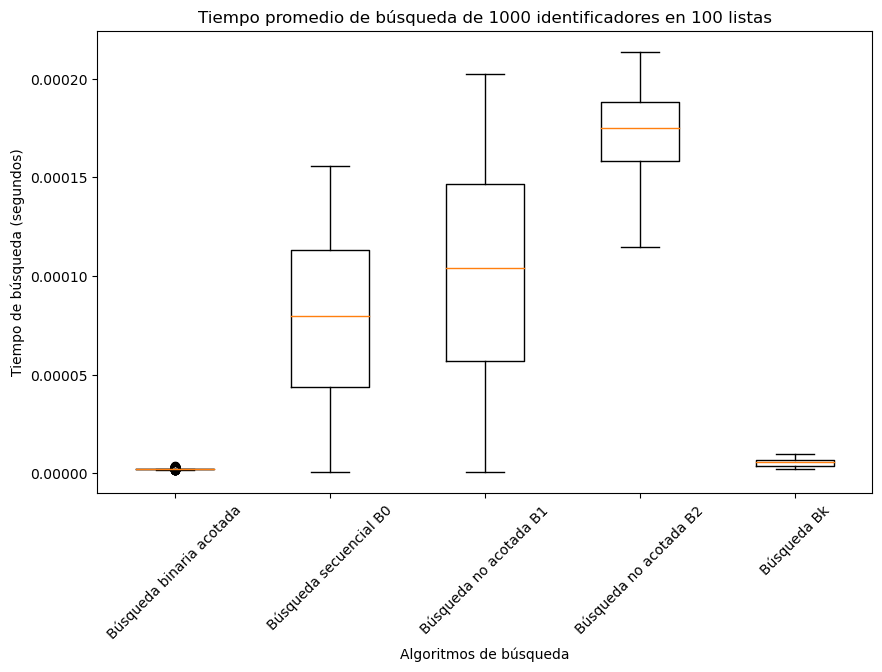

In [ ]:
# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tiempos_promedio_final.values())
ax.set_xticklabels(tiempos_promedio_final.keys())
ax.set_xlabel('Algoritmos de búsqueda')
ax.set_ylabel('Tiempo de búsqueda (segundos)')
ax.set_title('Tiempo promedio de búsqueda de 1000 identificadores en 100 listas')
plt.xticks(rotation=45)
plt.show()

### Conclusión

Después de medir el tiempo promedio para buscar 1000 identificadores de documentos en cada una de las 100 listas utilizando los algoritmos de búsqueda, podemos concluir que la búsqueda binaria acotada es el algoritmo más rápido, seguido de la búsqueda casi óptima Bk, mientras que la búsqueda secuencial B0 y la búsqueda no acotada B1 y B2 son significativamente más lentas.

Este resultado es consistente con la teoría, ya que la búsqueda binaria acotada y la búsqueda casi óptima Bk tienen una complejidad de O(log n), mientras que la búsqueda secuencial B0 y la búsqueda no acotada B1 y B2 tienen una complejidad de O(n). Por lo tanto, la elección del algoritmo de búsqueda depende de la cantidad de datos y el tiempo que se tiene disponible para la búsqueda. Si el tiempo es un factor crítico, es recomendable usar la búsqueda binaria acotada o la búsqueda casi óptima Bk.

In [ ]:
from statistics import mean

for key,vals in tiempos_promedio_final.items():
    print("Promedio para {} fue {}".format(key,round(mean(vals),6)) + " segundos")

Promedio para Búsqueda binaria acotada fue 2e-06 segundos
Promedio para Búsqueda secuencial B0 fue 7.8e-05 segundos
Promedio para Búsqueda no acotada B1 fue 0.000102 segundos
Promedio para Búsqueda no acotada B2 fue 0.000172 segundos
Promedio para Búsqueda Bk fue 6e-06 segundos
